In [25]:
import os, sys, shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm

In [2]:
# 레이블 불러오기
label = pd.read_csv('./labels.csv')

In [4]:
label

id                 breed
0      78c7b5a2dd1c9612ae14bf9e326090e6   miniature_schnauzer
1      8b332e46e140af54feecbdff46cad87b  old_english_sheepdog
2      f441dc37af37eb01c9fa3e0950228642          ibizan_hound
3      a7702c83da79d54e27d2e9b1f01fe64e                   pug
4      2f811d41fd9d4195785dc0f65c26125a   rhodesian_ridgeback
...                                 ...                   ...
10680  cdb32ac86d0475b5d32667582acaf267              shih-tzu
10681  c417aa964d70adaa3cd866b7b1bc9e92                   pug
10682  032620ae0f847d957d94d1fd76cb17e8                 dhole
10683  e5064451d5ce1b406452427679281bbc                saluki
10684  2c5e1a46763f9769924089a9f3616ffc      lakeland_terrier

[10685 rows x 2 columns]

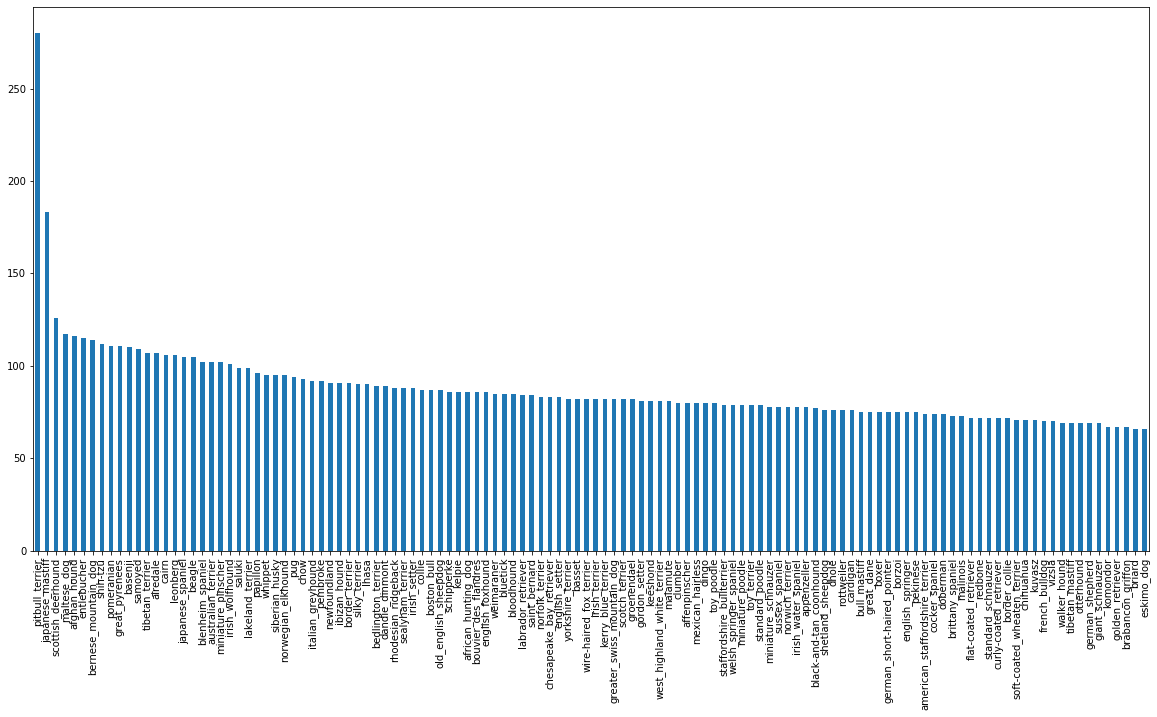

In [3]:
# 레이블의 강아지 품종 분포 확인
label['breed'].value_counts().plot.bar(figsize=(20,10))

In [5]:
# 강아지 122품종
unique_label = np.unique(label['breed'])

In [6]:
unique_label

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

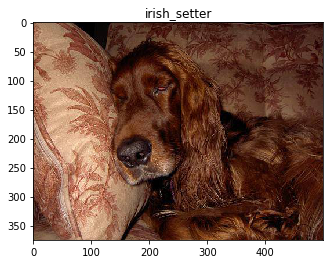

In [8]:
# 이미지 시각화
path  = os.path.join(os.getcwd(), 'dog_breed')
img_num = 50
path = path + '/{}'.format(label['id'][img_num]) + '.jpg'
img = plt.imread(path)
plt.imshow(img)
plt.title('{}'.format(label['breed'][img_num]))
plt.show()

In [9]:
filenames = [filename for filename in label['id']]

In [10]:
filenames

['78c7b5a2dd1c9612ae14bf9e326090e6',
 '8b332e46e140af54feecbdff46cad87b',
 'f441dc37af37eb01c9fa3e0950228642',
 'a7702c83da79d54e27d2e9b1f01fe64e',
 '2f811d41fd9d4195785dc0f65c26125a',
 '429659b519b82425c43ab412b1f54bb0',
 '6eeae947efa8162eb3b8e8a0bafc7997',
 '060112a1a77217039de21f7d0963929d',
 '6bab1784b0b33075e6d6f26714c1164f',
 'e4913c578cba8c59d842663fa734d337',
 '141321373d0535ee37171a2d6ca9bcbb',
 'a00af55eaca223de36018867b5cf729f',
 '644b20efdc7375c268aa32c7b79d0b41',
 'fa4387315a7d0a81f033dc647546220a',
 '1831f3ce615ffe27a78c5baa362ac677',
 '5d0f4a2a6c5cacb5588a71c5c6d3cf0c',
 'pitbull_terrier_246',
 'fca387fcb6630ae11536b3374d3b2234',
 '951117cb0e8bea7251480a08f6833686',
 'a68e6419efb8c5675fead034aadae947',
 '445263c4349c957b9d2a87f5646699c1',
 '5bfd9576067a577da2cc278db7aae2e7',
 'f2b70abdaeaae871fba924ab80d3253e',
 '24c70e236822e958236adf329d348f4d',
 '29b06acb65e3873dfab2a7b2581d6a35',
 '7a769530c761718f1ff64d9ec8e05068',
 'e278e285726d3ec4b737d80cc891d266',
 '1dbdfe0bd41b

In [12]:
tmpX, test_X, tmpY, test_Y = train_test_split(filenames, label['breed'],
                                              test_size=0.2,
                                              shuffle=True,
                                              stratify=label['breed'],
                                              random_state=319)

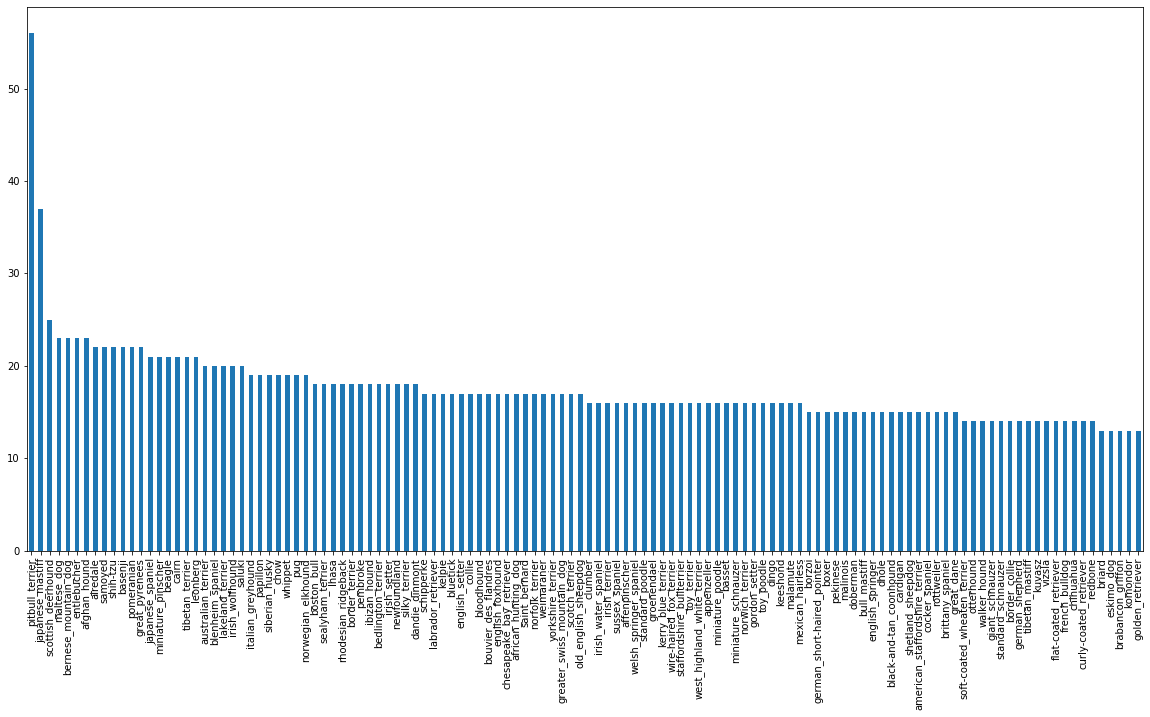

In [14]:
test_Y.value_counts().plot.bar(figsize=(20, 10))

In [15]:
train_X, val_X, train_Y, val_Y = train_test_split(tmpX, tmpY,
                                                  test_size=0.25,
                                                  shuffle=True,
                                                  stratify=tmpY)

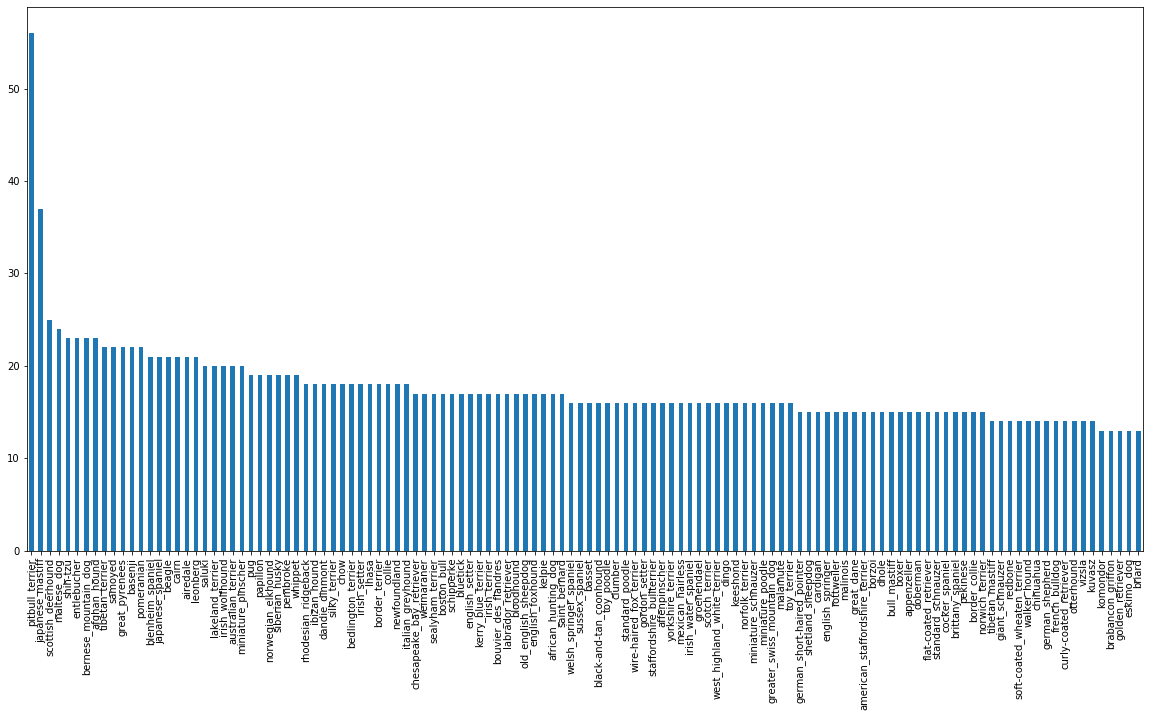

In [16]:
val_Y.value_counts().plot.bar(figsize=(20, 10))

In [21]:
train = pd.DataFrame({'id':train_X, 'breed':train_Y})
val = pd.DataFrame({'id':val_X, 'breed':val_Y})
test = pd.DataFrame({'id':test_X, 'breed':test_Y})

In [22]:
train

id               breed
7629                japanese_mastiff_70    japanese_mastiff
6157   5fb78d58dc5aa4bda751f1c675da7a51               cairn
2156   b3eb6305969fbae09c13ef3b9e5c2dc4             whippet
7648   c0c60bf6e9807b71e15c63309ed58e36       irish_terrier
3284   1d1584d7fb1d92bae311a7e436829e08         maltese_dog
...                                 ...                 ...
1238   892e56e6999bac353ddedf9162b04959    blenheim_spaniel
336    447209457aec544c9a9df35b50c5f700       saint_bernard
5119   4b47fe23fa6972002789b8c68cdf7395    sealyham_terrier
10627  3750b67c94da830ec97545755d316a2c  kerry_blue_terrier
4307   6597afaacc6527e63e4f21a552b74889  bedlington_terrier

[6411 rows x 2 columns]

In [23]:
val

id                    breed
5818  6f0e400b3f6fb868d2e673da9eba2ad5  black-and-tan_coonhound
2518  424c3990e83cdb18b5d0fe48a5cf7327              maltese_dog
2102  6e5352cce31db68901e5887b12bc9f38               otterhound
9811  799017168bea86fbb6a83c5d97cc0b8c                   borzoi
8672  a7b0055c47417e89c9769f28b668b04f           dandie_dinmont
...                                ...                      ...
5388  d2181ad8aa2f5fe3f6ef63b0bae7cc52       kerry_blue_terrier
1803  1af14f734087da9b1405f8f02a4374b1             irish_setter
5606  fdcf75632c624d8d03b37ddb1c6fc592          tibetan_mastiff
5552  3ffa337507d37b6c29e43afd6773f400             ibizan_hound
8630  c31a79ecf4c0280d60c0c99d9fb9710c                 cardigan

[2137 rows x 2 columns]

In [24]:
test

id                        breed
4026  bd38394c6fcd00d108b4f84eab91a9b9  soft-coated_wheaten_terrier
9880  b902b671e9b94bab23b5f559194b6787         bouvier_des_flandres
2041  9b5a4262c5417a1b725dc1fb1c97b195      wire-haired_fox_terrier
7308  7a1235e58df9cb1759647c149b4a27c2                  entlebucher
2022  7f05b953cc5734f48977eb82baaa3ed6            shetland_sheepdog
...                                ...                          ...
3613  fb6bca9a75ead518333fd3c98aa4dc40                       kuvasz
1089  3e0a4d4a13e170d406d4e48aee99fec1                      whippet
6180  4bb8d3ce941405a50a75b1a7b3b831d3                       beagle
4017  cdffff7690054e91eab8e7237df12406           scottish_deerhound
4832  97d712e7a54a5c89ebb6c41947128fb1                     shih-tzu

[2137 rows x 2 columns]

In [45]:
# train 폴더로 6,411장 이미지 복사
origin_path = './dog_breed'

for breed in tqdm(np.unique(train['breed']).tolist()):
    path = './dataset/train/' + breed
    os.mkdir(path)
    new_path = './dataset/train/' + breed 
    for fname in train[train['breed'] == breed]['id']:
        fname = fname + '.jpg'
        src = os.path.join(origin_path, fname)
        dst = os.path.join(new_path, fname)
        shutil.copyfile(src, dst)

In [46]:
# val 폴더로 2,137장 이미지 복사
origin_path = './dog_breed'

for breed in tqdm(np.unique(val['breed']).tolist()):
    path = './dataset/val/' + breed
    os.mkdir(path)
    new_path = './dataset/val/' + breed 
    for fname in val[val['breed'] == breed]['id']:
        fname = fname + '.jpg'
        src = os.path.join(origin_path, fname)
        dst = os.path.join(new_path, fname)
        shutil.copyfile(src, dst)

In [47]:
# test 폴더로 2137장 이미지 복사
origin_path = './dog_breed'

for breed in tqdm(np.unique(test['breed']).tolist()):
    path = './dataset/test/' + breed
    os.mkdir(path)
    new_path = './dataset/test/' + breed 
    for fname in test[test['breed'] == breed]['id']:
        fname = fname + '.jpg'
        src = os.path.join(origin_path, fname)
        dst = os.path.join(new_path, fname)
        shutil.copyfile(src, dst)